# Data agumentation

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from google.colab import files
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow


In [37]:

for dir in os.listdir('/content/drive/MyDrive/Train'):
  count=0
  football_index=401
  swimming_index=241
  rowing_index=203
  tennis_index=186
  basketball_index=197
  for sub_folder in os.listdir(os.path.join('/content/drive/MyDrive/Train',dir)):

    if(dir=='Yoga'):
      continue
      
    elif dir =='Football':
      folder_path=os.path.join('/content/drive/MyDrive/Train',dir)
      
      img=cv2.imread(os.path.join(folder_path,sub_folder))
      horizontal=cv2.flip(img,1)
      path=os.path.join('/content/drive/MyDrive/agumentation/Football','Football_'+str(football_index)+'.jpeg')
      cv2.imwrite(path,horizontal)
      football_index=football_index+1
      if(count==50):
        break
      count=count+1

    elif dir =='Swimming':
      folder_path=os.path.join('/content/drive/MyDrive/Train',dir)
      
      img=cv2.imread(os.path.join(folder_path,sub_folder))
      horizontal=cv2.flip(img,1)
      path=os.path.join('/content/drive/MyDrive/agumentation/Swimming','Swimming_'+str(swimming_index)+'.jpeg')
      cv2.imwrite(path,horizontal)
      swimming_index=swimming_index+1
      if(count==210):
        break
      count=count+1

    elif dir =='Rowing':
      folder_path=os.path.join('/content/drive/MyDrive/Train',dir)
      img=cv2.imread(os.path.join(folder_path,sub_folder))
      horizontal=cv2.flip(img,1)
      path=os.path.join('/content/drive/MyDrive/agumentation/Rowing','Rowing_'+str(rowing_index)+'.jpeg')
      cv2.imwrite(path,horizontal)
      rowing_index=rowing_index+1
      
      if(count<48):
        verticle=cv2.flip(img,0)
        path=os.path.join('/content/drive/MyDrive/agumentation/Rowing','Rowing_'+str(rowing_index)+'.jpeg')
        cv2.imwrite(path,verticle)
        rowing_index=rowing_index+1
            
      count=count+1
    
    elif dir =='Tennis':
      folder_path=os.path.join('/content/drive/MyDrive/Train',dir)
      img=cv2.imread(os.path.join(folder_path,sub_folder))
      horizontal=cv2.flip(img,1)
      path=os.path.join('/content/drive/MyDrive/agumentation/Tennis','Tennis_'+str(tennis_index)+'.jpeg')
      cv2.imwrite(path,horizontal)
      tennis_index=tennis_index+1
      
      if(count<80):
        verticle=cv2.flip(img,0)
        path=os.path.join('/content/drive/MyDrive/agumentation/Tennis','Tennis_'+str(tennis_index)+'.jpeg')
        cv2.imwrite(path,verticle)
        tennis_index=tennis_index+1
            
      count=count+1
    
    elif dir =='Basketball':
      folder_path=os.path.join('/content/drive/MyDrive/Train',dir)
      img=cv2.imread(os.path.join(folder_path,sub_folder))
      horizontal=cv2.flip(img,1)
      path=os.path.join('/content/drive/MyDrive/agumentation/Basketball','Basketball_'+str(basketball_index)+'.jpeg')
      cv2.imwrite(path,horizontal)
      basketball_index=basketball_index+1
      
      if(count<58):
        verticle=cv2.flip(img,0)
        path=os.path.join('/content/drive/MyDrive/agumentation/Basketball','Basketball_'+str(basketball_index)+'.jpeg')
        cv2.imwrite(path,verticle)
        basketball_index=basketball_index+1
            
      count=count+1

# Load Data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from google.colab import files

In [2]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Train',labels='inferred',class_names=['Basketball','Football','Rowing','Swimming','Tennis','Yoga'])

Found 1681 files belonging to 6 classes.


In [3]:
data_iterator=data.as_numpy_iterator()

In [4]:
batch=data_iterator.next()

In [5]:
len(batch[1])

32

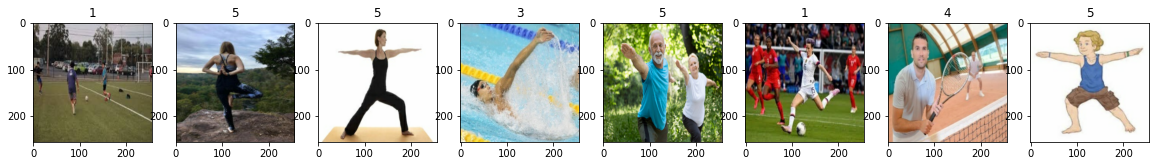

In [6]:
fig,ax=plt.subplots(ncols=8,figsize=(20,20))
for idx, img in enumerate(batch[0][0:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

#Preprocessing

##Scaled data

In [7]:
data=data.map(lambda x,y : (x/255,y))

In [8]:
scaled_iterator=data.as_numpy_iterator()

In [9]:
batch=scaled_iterator.next()

In [10]:
print("Max : "+str(batch[0].max()))
print("min : "+str(batch[0].min()))

Max : 1.0
min : 0.0


## Spliting Data

In [11]:
len(data)

53

In [12]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)+1

In [13]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [14]:
len(train)

37

In [15]:
len(val)

10

In [16]:
len(test)

6

# Model 1 

## Build model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [18]:
model=Sequential()

In [19]:
#model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
#model.add(MaxPool2D())

#model.add(Conv2D(32,(3,3), 1 , activation='relu'))
#model.add(MaxPool2D())

#model.add(Conv2D(64,(3,3), 1 , activation='relu'))
#model.add(MaxPool2D())

#model.add(Flatten())

#model.add(Dense(256,activation='relu'))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(64,activation='relu'))
#model.add(Dense(6,activation='softmax'))


In [20]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


In [21]:
model.compile('adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 256)               3

##Train model

In [23]:
logdir='/content/drive/MyDrive/logs_CNN_model'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
37/37 [==============================] - 127s 3s/step - loss: 3.5878 - accuracy: 0.4341 - val_loss: 1.1300 - val_accuracy: 0.6438
Epoch 2/20
37/37 [==============================] - 16s 414ms/step - loss: 0.8661 - accuracy: 0.6951 - val_loss: 0.6852 - val_accuracy: 0.7437
Epoch 3/20
37/37 [==============================] - 16s 413ms/step - loss: 0.4850 - accuracy: 0.8395 - val_loss: 0.5866 - val_accuracy: 0.8000
Epoch 4/20
37/37 [==============================] - 11s 291ms/step - loss: 0.2415 - accuracy: 0.9248 - val_loss: 0.6155 - val_accuracy: 0.8281
Epoch 5/20
37/37 [==============================] - 12s 293ms/step - loss: 0.1805 - accuracy: 0.9603 - val_loss: 0.5420 - val_accuracy: 0.8438
Epoch 6/20
37/37 [==============================] - 11s 288ms/step - loss: 0.0942 - accuracy: 0.9797 - val_loss: 0.5385 - val_accuracy: 0.8594
Epoch 7/20
37/37 [==============================] - 16s 413ms/step - loss: 0.0479 - accuracy: 0.9924 - val_loss: 0.3807 - val_accuracy: 0.8875
E

## plot performance

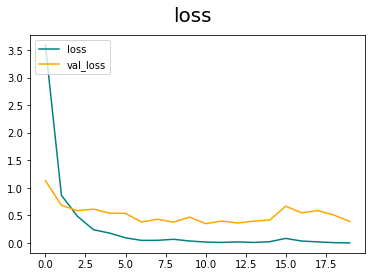

In [25]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

## evaluate performance


In [26]:
from tensorflow.keras.metrics import Precision,Recall,Accuracy

In [27]:
pre=Precision()
re=Recall()
acc=Accuracy()

In [28]:
len(test)

6

In [29]:
for batch in test.as_numpy_iterator():
  x,y=batch
  print(y.shape)
  yhat=model.predict(x)
  print(yhat.shape)
  yhat=np.argmax(yhat,axis=1)
  print(yhat.shape)
  acc.update_state(y,yhat)

(32,)
1/1 [==============================] - 0s 114ms/step
(32, 6)
(32,)
(32,)
1/1 [==============================] - 0s 30ms/step
(32, 6)
(32,)
(32,)
1/1 [==============================] - 0s 28ms/step
(32, 6)
(32,)
(32,)
1/1 [==============================] - 0s 39ms/step
(32, 6)
(32,)
(32,)
1/1 [==============================] - 0s 30ms/step
(32, 6)
(32,)
(17,)
1/1 [==============================] - 0s 210ms/step
(17, 6)
(17,)


In [30]:
print("accuracy is : "+str(acc.result().numpy()) )

accuracy is : 0.8305085


In [31]:
import cv2

In [32]:
test=[]
names=[]
for dir in os.listdir('/content/drive/MyDrive/Test'):
  img=cv2.imread(os.path.join('/content/drive/MyDrive/Test',dir))
  names.append(dir)
  resize=tf.image.resize(img,(256,256))
  resize=resize/255
  test.append(resize)

In [33]:
array=np.array(test)


In [34]:
y_hat=model.predict(array)

22/22 [==============================] - 1s 25ms/step


In [35]:
y_hat=np.argmax(y_hat,axis=1)

In [45]:
output=pd.DataFrame(names,columns=['image_name'])


In [48]:
output['label']=y_hat

In [53]:
output.head()

,image_name,label
0,152.jpg,0
1,146.jpg,1
2,144.jpg,1
3,177.jpg,3
4,181.jpg,2


In [56]:
output.to_csv("data5.csv",index=False)

In [57]:
files.download('data5.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#agumentation Model

##load Data after agumentation

In [38]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/After_Agumentation',labels='inferred',class_names=['Basketball','Football','Rowing','Swimming','Tennis','Yoga'])

Found 2712 files belonging to 6 classes.


In [39]:
data_iterator=data.as_numpy_iterator()

In [40]:
batch=data_iterator.next()

In [43]:
len(data)

85

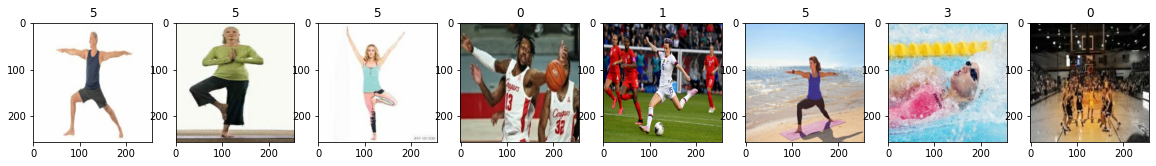

In [44]:
fig,ax=plt.subplots(ncols=8,figsize=(20,20))
for idx, img in enumerate(batch[0][0:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])